In [2]:
%pip install skyfield
from skyfield.api import load

planets = load('de423.bsp')
earth, mars = planets['earth'], planets['mars']

ts = load.timescale()
t = ts.now()
astrometric = earth.at(t).observe(mars)
ra, dec, distance = astrometric.radec()

print(ra)
print(dec)
print(distance)

barycentric = mars.at(t)


  Running setup.py install for jplephem: started
    Running setup.py install for jplephem: finished with status 'done'
  Running setup.py install for sgp4: started
    Running setup.py install for sgp4: finished with status 'done'
  Running setup.py install for skyfield: started
    Running setup.py install for skyfield: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


[#################################] 100% de423.bsp
[#################################] 100% deltat.data
[#################################] 100% deltat.preds
[#################################] 100% Leap_Second.dat


14h 04m 49.95s
-11deg 56' 19.0"
2.42428 au


In [6]:
len(plist)

10

removed 8712 frames


<IPython.core.display.Javascript object>


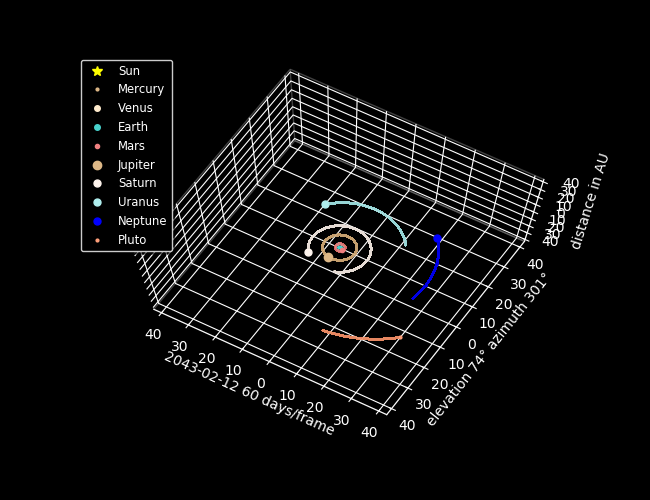

In [16]:
###### %pip install skyfield
from skyfield.api import load

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
%matplotlib notebook

# from matplotlib.legend_handler import HandlerPatch
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
# import matplotlib.patches as mpatches
# from matplotlib.collections import PatchCollection
# from math import floor, factorial
# %matplotlib notebook
# with plt.xkcd():

# Python3 code here creating class
class planets:
    def __init__(self, name, marker=None, color=None, markersize=None, trailmax=None):
        self.name       = name
        self.marker     = marker if marker is not None else 'o'
        self.color      = color if color is not None else 'k'
        self.markersize = markersize if markersize is not None else 1

# creating list
plist = []

# appending instances to list
plist.append(planets(name='Sun',     color='yellow',          markersize=7, marker='*'))
plist.append(planets(name='Mercury', color='burlywood',       markersize=2))
plist.append(planets(name='Venus',   color='blanchedalmond',  markersize=4))
plist.append(planets(name='Earth',   color='mediumturquoise', markersize=4))
plist.append(planets(name='Mars',    color='lightcoral',      markersize=3))
plist.append(planets(name='Jupiter', color='burlywood',       markersize=6))
plist.append(planets(name='Saturn',  color='seashell',        markersize=5))
plist.append(planets(name='Uranus',  color='paleturquoise',   markersize=5))
plist.append(planets(name='Neptune', color='blue',            markersize=5))
plist.append(planets(name='Pluto',   color='lightsalmon',     markersize=2))

# plist.append(planets(name='Mercury',             color='#DBCECA', markersize=2))
# plist.append(planets(name='Venus',               color='#8B7D82', markersize=5))
# plist.append(planets(name='Earth',               color='#34a56f', markersize=5))
# plist.append(planets(name='Mars',                color='#BC2A3A', markersize=3))

# for obj in plist:
#     print( obj.name, obj.marker, obj.color, obj.markersize, sep =' ' )

# We can also access instances attributes
# as list[0].name, list[0].roll and so on.

eph = load('de421.bsp')
"""
'; de421.bsp LOG FILE\n;\n; Created 2008-02-12/11:33:34.00.\n;\n;
BEGIN NIOSPK COMMANDS\n\nLEAPSECONDS_FILE    = naif0007.tls\n
SPK_FILE            = de421.bsp\n  SPK_LOG_FILE      = de421_spk_conversion.log\n
NOTE              = NIOSPK 6.1.0 Conversion\n  SOURCE_NIO_FILE   = de421.nio\n
BEGIN_TIME      = CAL-ET 1899 JUL 29 00:00:00.000\n
END_TIME        = CAL-ET 2053 OCT 09 00:00:00.000\n\n; END NIOSPK COMMANDS\n'
"""
# 'SOLAR SYSTEM BARYCENTER',
# names = ['Sun',
#          'Mercury',
#          'Venus',
#          'Earth',
# #          'Moon',
#          'Mars',
#          'Jupiter barycenter',
#         ]

# sun     = eph[names[0]]
# mercury = eph[names[1]]
# venus   = eph[names[2]]
# earth   = eph[names[3]]
# # moon    = eph[names[4]]
# mars    = eph[names[4]]
# # jupiter = eph[names[5]]
# # names[5] = 'Jupiter' # lose the 'barycenter' part

# plist[5].name = 'Jupiter' # lose the 'barycenter' part

sun     = eph[plist[0].name]
mercury = eph[plist[1].name]
venus   = eph[plist[2].name]
earth   = eph[plist[3].name]
# moon    = eph[names[4]]
mars    = eph[plist[4].name]
jupiter = eph['Jupiter barycenter']
saturn  = eph['Saturn barycenter']
urаnus  = eph['Uranus barycenter']
neptune = eph['Neptune barycenter']
pluto   = eph['Pluto barycenter']
# names[5] = 'Jupiter' # lose the 'barycenter' part

ts = load.timescale()

hours = 35*365*24
interval = 48*30

numremoved = 0
t  = ts.utc(2019,10,16,range(hours))
while len(t)>1 and t[-1].tt>2471184.5:
    t=t[:-1]
    numremoved += 1
# t = [ts.now()]

if numremoved:
    print('removed {} frames'.format(numremoved))
    hours -= numremoved
#     del(t[:])
    t  = ts.utc(2019,10,16,range(hours))

assert t[-1].tt<2471184.5, 'Dates are out of range'

# sun_p     = sun.at(t).ecliptic_position().au
# mercury_p = mercury.at(t).ecliptic_position().au
# venus_p   = venus.at(t).ecliptic_position().au
# earth_p   = earth.at(t).ecliptic_position().au
# # moon_p    = moon.at(t).ecliptic_position().au
# mars_p    = mars.at(t).ecliptic_position().au
# # jupiter_p = jupiter.at(t).ecliptic_position().au

sun_p     = eph[plist[0].name].at(t).ecliptic_position().au
mercury_p = eph[plist[1].name].at(t).ecliptic_position().au
venus_p   = eph[plist[2].name].at(t).ecliptic_position().au
earth_p   = eph[plist[3].name].at(t).ecliptic_position().au
# moon_p    = moon.at(t).ecliptic_position().au
mars_p    = eph[plist[4].name].at(t).ecliptic_position().au
jupiter_p = jupiter.at(t).ecliptic_position().au
saturn_p  = saturn.at(t).ecliptic_position().au
uranus_p  = urаnus.at(t).ecliptic_position().au
neptune_p = neptune.at(t).ecliptic_position().au
pluto_p   = pluto.at(t).ecliptic_position().au

ps = [sun_p,
      mercury_p,
      venus_p,
      earth_p,
#       moon_p,
      mars_p,
      jupiter_p,
      saturn_p,
      uranus_p,
      neptune_p,
      pluto_p,
     ]

hw = max([np.abs(p).max() for p in ps])
# heightmax = max([p.max() for p in ps])
# heightmin = min([p.min() for p in ps])
# widthmax = max([p.max() for p in ps])
# widthmin = min([p.min() for p in ps])

size = [-hw*1.05, hw*1.05]

fig = plt.figure(figsize=(6.5, 5), dpi=100)
ax   = fig.add_subplot(1, 1, 1, projection ='3d')
"""ax2d = fig.add_subplot(2, 1, 2)
"""
dots   = []
trails = []

"""dots2d   = []
trails2d = []
"""
for i,p in enumerate(ps):
    x, y, z = p # z is ignored in 2D plots
#     ax.plot(x, y, z, label=names[i])
#     x_venus, y_venus, z_venus = venus_p
#     x_earth, y_earth, z_earth = earth_p
#     x_moon, y_moon, z_moon = moon_p
#     if i==0:
#         newdot, = plt.plot([x[0]], [y[0]], [z[0]], 'y*', ms=8, label=names[i])
#     else:
#     newdot, = plt.plot([x[0]], [y[0]], [z[0]], '.', ms=8, label=names[i])
#     newdot, = plt.plot([x[0]], [y[0]], [z[0]],
#                        marker=plist[i].marker,
#                        ms=plist[i].markersize,
#                        label=plist[i].name,
#                        color=plist[i].color,
#                       linestyle = 'None',
#                       )
#     dots.append(newdot)

    newdot, = plt.plot([x[0]], [y[0]], [z[0]],
                       marker=plist[i].marker,
                       ms=plist[i].markersize,
                       label=plist[i].name,
                       color=plist[i].color,
                      linestyle = 'None',
                      )
    dots.append(newdot)
    
#     newdot2d, = plt.plot([x[0]], [y[0]],
#                        marker=plist[i].marker,
#                        ms=plist[i].markersize,
#                        label=plist[i].name,
#                        color=plist[i].color,
#                       linestyle = 'None',
#                       )
#     dots2d.append(newdot)

#     newtrail, = plt.plot([x[0]], [y[0]], [z[0]],
#                         marker='.',
#                         ms=plist[i].markersize/10,
#                         color=plist[i].color,
#                         linestyle = 'None',
#                         )
#     trails.append(newdot)

    newtrail, = plt.plot(x[:1],
                         y[:1],
                         z[:1],
                         marker='.',
#                          ms=plist[i].markersize/50,
                         ms=0.01,
                         color=plist[i].color,
                         linestyle = 'None',
                        )
    trails.append(newtrail)

# venus_dot, = plt.plot([x_venus[0]], [y_venus[0]], '.', ms=0.8, label='venus')
# earth_dot, = plt.plot([x_earth[0]], [y_earth[0]], '.', ms=0.8, label='earth')
# moon_dot,  = plt.plot([x_moon[0]], [y_moon[0]], '.', ms=0.5, label='moon')

ax.set_xlim(size)
ax.set_ylim(size)
# ax.set_xlim(left=widthmin,right=widthmax)
# ax.set_ylim(bottom=heightmin,top=heightmax)
ax.set_zlim(size)
"""ax2d.set_xlim(size)
ax2d.set_ylim(size)
"""
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_zlabel('distance in AU')
"""ax2d.set_xlabel('distance in AU')
ax2d.set_ylabel(None)
"""
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
"""ax2d.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2d.yaxis.set_major_locator(MaxNLocator(integer=True))
"""
# ax.legend()

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
"""ax2d.xaxis.pane.fill = False
ax2d.yaxis.pane.fill = False
"""
ax.set_frame_on(True)
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('grey')
ax.yaxis.pane.set_edgecolor('grey')
ax.zaxis.pane.set_edgecolor('grey')

ticks =  ax.get_yticks()
# ticks = ticks[1:] # compensates for an error in some versions of the 3d view system. might not be needed.
# set labels to absolute values and with integer representation
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
ax.set_yticklabels([int(abs(tick)) for tick in ticks])
ax.set_zticklabels([int(abs(tick)) for tick in ticks])

# Bonus: To get rid of the grid as well:
# ax.grid(False)

# ax.set_xticklabels(ax.get_xticks())
# ax.set_yticklabels(ax.get_yticks())
# ax.set_zticklabels(ax.get_zticks())

# xyticklabels=[1,0,1]
# # xyticklabels=[]
# # ax = plt.subplot(1,1,1,frameon=False,xticks=xyticklabels,yticks=xyticklabels,xlim=(-1.05,1.8),ylim=(-1.1,1.1))
# ax.set_xticklabels(xyticklabels)
# ax.set_yticklabels(xyticklabels)
# ax.set_zticklabels(xyticklabels)

# ax = fig.add_subplot(1, 1, 1)
# ax.axis('off')
# ax.grid(axis="x", color="green", alpha=.3, linewidth=2, linestyle=":")

handles, labels = ax.get_legend_handles_labels()
# handles.append(xPoly)
plt.style.use(['dark_background'])
plt.rcParams['figure.facecolor'] = 'black'
plt.legend(bbox_to_anchor=(0.18, 1), # bbox_to_anchor lets you set the legend outside the figure
               handles=handles,      # our updated list of handles
               loc='upper right',
               ncol=1,
               fontsize='small',
               borderaxespad=0.0,
               shadow=True,
              )

# ax.set_aspect('equal') # makes circles look like circles
"""ax2d.set_aspect('equal') # makes circles look like circles
"""
# plt.show()
def init():
#     return venus_dot, earth_dot, moon_dot
    return dots, trails

# for i in range(days):
# #     dots[i].set_data(x[i],y[i])
#     venus_dot.set_data(x_venus[i],y_venus[i])
#     earth_dot.set_data(x_earth[i],y_earth[i])
#     moon_dot.set_data(x_moon[i],y_moon[i]) 
# import datetime

# date_time = t.utc_datetime()[0]
# hour = 2
# date_time += +datetime.timedelta(minutes=hour)
# plt.title('index: {:^2.1f}'.format(hour))

# delta_time = 4
# date_time = t[0]
# # for hour in range(0,10,1):
# delta_time += hour
# #     date_time=date_time+datetime.timedelta(minutes=delta_time)
# print('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))
# ax.set_title('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))
# ax.set_title('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))

plt.show()

def animate(hour):
#     delta_time += hour
#     plt.title('{:^2.0f} {:%Y-%m-%d %H:%M}'.format(hour, date_time.utc_datetime()+datetime.timedelta(hours=hour)))
    pctleft = (hours-hour-hours%interval)/hours
    if hours >= 24:
        if hours%24==0:
#             plt.title('{:%Y-%m-%d} {:^d} days/frame'.format(t[hour].utc_datetime(), interval//24))
            ax.set_xlabel('{:%Y-%m-%d} {:^d} days/frame'.format(t[hour].utc_datetime(), interval//24))
        else:
#             plt.title('{:%Y-%m-%d} {:^d} days/frame'.format(t[hour].utc_datetime(), interval/24))
            ax.set_xlabel('{:%Y-%m-%d} {:^d} days/frame'.format(t[hour].utc_datetime(), interval/24))
    else:
#         plt.title('{:%Y-%m-%d} {:^d} hrs/frame'.format    (t[hour].utc_datetime(), interval))
        ax.set_xlabel('{:%Y-%m-%d} {:^d} hrs/frame'.format    (t[hour].utc_datetime(), interval))
#       plt.title('{:%Y-%m-%d} frame {:^.0f}/{:^2.0f} every {:^.0f} hrs {:^2.2%} left'.format(t[hour].utc_datetime(), hour+interval, hours, interval, pctleft))
#     plt.title('{:%Y-%m-%d %H:%M} frame {:^2.0f}/{:^2.0f}'.format(t[0].utc_datetime()+datetime.timedelta(hours=interval*hour), hour+1, hours))
#     plt.title('{:^2.0f} {:%Y-%m-%d %H:%M}'.format(hour, t[0].utc_datetime()))#+datetime.timedelta(hours=hour)))
#     plt.title('index: {:^2.1f}'.format(hour))
    # elevation angle : -180 deg to 180 deg
    
#     ax.set_ylabel('{:%Y-%m-%d %H:%M} frame {:^.0f}/{:^2.0f} every {:^.0f} hrs {:^2.2%} left'.format(t[hour].utc_datetime(), hour+interval, hours, interval, pctleft))

    elev=90*np.sin((np.pi/180)*(180-180*pctleft))
    azim=360-45-45*pctleft
    ax.view_init(elev=elev, azim=azim)
    ax.set_ylabel('elevation {:^.0f}° azimuth {:^.0f}°'.format(elev, azim))

#     ax.view_init(elev=(i-45)*4, azim=10)
    for i,p in enumerate(ps):
        x, y, z = p # z is ignored in 2D plots
#         x_venus, y_venus, z_venus = venus_p
#         x_earth, y_earth, z_earth = earth_p
#         x_moon, y_moon, z_moon = moon_p
        dots[i].remove()
#         dots[i], = plt.plot([x[hour]], [y[hour]], [z[hour]], '.', ms=8)
        dots[i], = plt.plot([x[hour]], [y[hour]], [z[hour]],
                            marker=plist[i].marker,
                            ms=plist[i].markersize,
                            color=plist[i].color,
                            linestyle = 'None',
                        )

        trails[i].remove()
#         dots[i], = plt.plot([x[hour]], [y[hour]], [z[hour]], '.', ms=8)
        trails[i], = plt.plot(x[:hour], y[:hour], z[:hour],
                            marker=plist[i].marker,
#                             ms=plist[i].markersize/50,
                            ms=0.05,
                            color=plist[i].color,
                            linestyle = 'None',
                            alpha = 0.5,
                        )


#         trails[i], = plt.plot(x[:hour if hour is not 0 else 1],
#                          y[:hour if hour is not 0 else 1],
#                          z[:hour if hour is not 0 else 1],
#                          marker='.',
#                          ms=plist[i].markersize/10,
#                          color=plist[i].color,
#                          linestyle = 'None',
#                         )

#         if hour>0:
#             trails[i].remove()
#             trails[i], = plt.plot(x[:hour], 
#                                   y[:hour], 
#                                   z[:hour],
#                                   marker='.',
#                                   ms=plist[i].markersize/10,
#                                   color=plist[i].color,
#                                   linestyle = 'None',
#                             )

#         if plist[i].trailmax < len(plist[i].trail):
#             del(plist[1].trail[0])
#             plist[i].trail[0].remove()

#         newpt, = plt.plot([x[hour]], [y[hour]], [z[hour]],
#                             marker='.',
#                             ms=plist[i].markersize/10,
#                             color=plist[i].color,
#                             linestyle = 'None',)
#             del(plist[i].trail[0])

#         plist[i].trail.append(newpt)
#         trails[i].append(newpt)
   
#         dots[i].set_data(x[hour],y[hour],z[hour])



#         venus_dot.set_data(x_venus[day],y_venus[day])
#         earth_dot.set_data(x_earth[day],y_earth[day])
#         moon_dot.set_data(x_moon[day],y_moon[day])
#     ax.set_title('day {:.2f}/{:.0f}'.format(hour/24, hours/24),fontsize=12)
#     t = datetime.datetime(2010, 7, 4, 12, 15, 58)
#     t = datetime.datetime(2019,1,1,hour)

#     date_time += +datetime.timedelta(minutes=hour)
#     ax.set_title('{:%Y-%m-%d %H:%M}'.format(date_time.utc_datetime()),fontsize=12)
#     ax.set_title('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()))#+datetime.timedelta(hours=delta_time)))
#     ax.set_title('{:^2.0f} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))
#     plt.set_title('{}'.format(delta_time))#, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))
#     ax.set_title('{:.0d}'.format(hour))
    return dots, trails
#     return venus_dot, earth_dot, moon_dot
#     pDot.set_data(xp,yp)
#     pLine.set_data((h,xp),(k,yp))
#     pPoly.set_xy(xy_pPoly)

progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
# plt.show()
animation = FuncAnimation(fig, animate, 
                          frames=range(0,hours,interval), # run the animation for all days represented
                          interval=10, blit=False, repeat=False, 
#                           repeat_delay=0.5,
                          init_func=init)

# writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
# animation.save("kepler's 3rd law-solar system.{} objs.{} data pts.mp4".format(len(plist), hours), writer=writer, 
#                progress_callback=progress_callback
#              ) #current directory

In [ ]:
ticks = ax.get_yticks()

In [ ]:
ticks

In [39]:
ax.set_yticks([ticks])

In [40]:
ax.get_yticks()

array([[-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]])

In [45]:
abvalticks = [int(abs(tick)) for tick in ticks]

In [46]:
abvalticks

[50, 40, 30, 20, 10, 0, 10, 20, 30, 40, 50]

In [43]:
ax.set_yticks([abvalticks])

In [44]:
ax.get_yticks()

array([[50., 40., 30., 20., 10.,  0., 10., 20., 30., 40., 50.]])

In [11]:
# set labels to absolute values and with integer representation
# ax.set_xticklabels([int(abs(tick)) for tick in ticks])
ax.set_yticks([int(abs(tick)) for tick in ticks])
# ax.set_zticklabels([int(abs(tick)) for tick in ticks])

In [5]:
eph.comments()

'; de421.bsp LOG FILE\n;\n; Created 2008-02-12/11:33:34.00.\n;\n; BEGIN NIOSPK COMMANDS\n\nLEAPSECONDS_FILE    = naif0007.tls\nSPK_FILE            = de421.bsp\n  SPK_LOG_FILE      = de421_spk_conversion.log\n  NOTE              = NIOSPK 6.1.0 Conversion\n  SOURCE_NIO_FILE   = de421.nio\n    BEGIN_TIME      = CAL-ET 1899 JUL 29 00:00:00.000\n    END_TIME        = CAL-ET 2053 OCT 09 00:00:00.000\n\n; END NIOSPK COMMANDS\n'

In [27]:
len(t)

297839

In [20]:
t[-1].tt>2471184.5

False

In [6]:
2471184.5

2471184.5

In [21]:
t[-1].tt

2471182.4591340744

In [26]:
t=t[:-1]

In [ ]:
len(dots), len(trails)

In [19]:
eph.spk.daf.bward.

3

In [ ]:
range(0,hours,interval)

In [ ]:
slice=1000
x[:slice], y[:slice], z[:slice]

In [ ]:
len(x), len(y), len(z)

In [ ]:
[x[0]], [y[0]], [z[0]]

In [ ]:
[x], [y], [z]

In [ ]:
plist[1].trailmax < len(plist[1].trail)

In [ ]:
len(plist[1].trail)

In [ ]:
plist[1].trail

In [ ]:
plist[1].trail[0]

In [ ]:
# %matplotlib inline
# plt.plot([x], [y], 
# #          [z],
#                             marker='.',
#                             ms=plist[1].markersize/10,
#                             color=plist[1].color,
#                             linestyle = 'None',
#         )

In [ ]:
del(plist[1].trail[0])

In [ ]:
len(plist[1].trail)

In [ ]:
plist[1].trail

In [ ]:
for i, p in enumerate(plist):
    trails[i].append(0)

In [ ]:
trails[1].append(newpt)

In [ ]:
trails

In [ ]:
class MyPlanet:
    name
    marker
    markercolor
    markersize
    pass

In [ ]:
MyPlanet = []

In [ ]:
MyPlanet.append('Sun')
MyPlanet.append('Mercury')
MyPlanet.append('Venus')
MyPlanet.append('Earth')

In [ ]:
MyPlanet.name

In [ ]:
# Python3 code here creating class 
class planets:  
    def __init__(self, name, marker=None, color=None, markersize=None):  
        self.name       = name  
        self.marker     = marker if marker is not None else 'o'
        self.color      = color if color is not None else 'k'
        self.markersize = markersize if markersize is not None else 1

# creating list        
list = []  
  
# appending instances to list  
list.append(planets(name='Sun. ',   marker='*', color='y', markersize=10))
list.append(planets(name='Mercury', marker='.', color='r', markersize=2))
list.append(planets(name='Venus',   marker='.', color='o'))
list.append(planets(name='Earth',               color='b'))
list.append(planets(name='Mars',                color='r'))

for obj in list: 
    print( obj.name, obj.marker, obj.color, obj.markersize, sep =' ' ) 
  
# We can also access instances attributes
# as list[0].name, list[0].roll and so on.

In [ ]:
dir(planets)

In [ ]:
print(eph)

In [ ]:
eph['sun']

In [ ]:
eph.names()

In [ ]:
eph.names()[0][0]

In [ ]:
ps[0]

In [ ]:
hours//24, interval

In [ ]:
hour += 2
print('{:^2.0f} {:%Y-%m-%d %H:%M}'.format(hour, t[0].utc_datetime()+datetime.timedelta(hours=hour)))

In [ ]:
  print('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))

In [ ]:
ax.set_title('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))

In [ ]:
date_time = t[0]

In [ ]:
date_time

In [ ]:
delta_time = 0
for hour in range(0,10,1):
    delta_time += hour
#     date_time=date_time+datetime.timedelta(minutes=delta_time)
    print('{} {:%Y-%m-%d %H:%M}'.format(delta_time, date_time.utc_datetime()+datetime.timedelta(hours=delta_time)))

In [ ]:
hour = 2
date_time = datetime.timedelta(minutes=hour)
date_time

In [ ]:
for string in t.utc_datetime():
    print('{:%Y-%m-%d %H:%M}'.format(string))

In [ ]:
t.utc_datetime()[1]-t.utc_datetime()[0]

In [ ]:
print('{:%Y-%m-%d %H:%M}'.format(t.utc_datetime()[0]+datetime.timedelta(minutes=30)))

In [ ]:
import datetime
d = datetime.datetime(2010, 7, 4, 12, 15, 58)
datetime.

In [ ]:
help('FORMATTING')